## Data Import and parsing

In [1]:
import warnings
warnings.filterwarnings('ignore')
## read in the swed file 
with open('310816_swd.txt', 'r') as myfile:
        content = myfile.readlines()
## Find the length 
house_hold_id=[]
individual_id=[]
channel_code=[]
start_time=[]
end_time=[]
tv_set=[]
audience_type=[]


for i in content:

    house_hold_id.append(i[0:8])
    individual_id.append(i[8:10])
    channel_code.append(i[10:14])
    start_time.append(i[14:20])
    end_time.append(i[20:26])
    tv_set.append(i[26])
    audience_type.append(i[27])
    
    
    
## Convert into pandas DF
import pandas as pd
swd_data = pd.DataFrame(
    {'House_hold_id': house_hold_id,
     'individual_id': individual_id,
     'channel_code': channel_code,
     'start_time':start_time,
     'end_time':end_time,
     'tv_set':tv_set,
     'audience_type':audience_type
    })

swd_data.head()

len(swd_data)

13417

In [2]:

bytes_read = open("310816_dem.txt", "rb").read()
m=[]
for i in bytes_read:
    m.append(str(chr(i)))
l=''.join(m)  
dem=l.splitlines()

house_hold_id_1=[]
individual_id_1=[]
weight=[]
viewer_type=[]
sampletype=[]
demographic_inf0=[]


for i in dem:
    house_hold_id_1.append(i[0:8])
    individual_id_1.append(i[8:10])
    weight.append(i[10:18])
    viewer_type.append(i[18])
    sampletype.append(i[19])
    demographic_inf0.append(i[20:(len(i)-1)])

    ## Clean up deomgraphic info :
demographic_inf0
## fidn the byte vlaue and subtract 48 and recast back :
dem_info=[]
for i in demographic_inf0:
    s=''
    for j in i:
        s+=str(ord(j)-48)+','
    dem_info.append(s)

    
dem_data=pd.DataFrame(
    {'House_hold_id': house_hold_id_1,
     'individual_id': individual_id_1,
     'weight':weight,
     'viewer_type':viewer_type,
     'sample_type':sampletype,
     'demographic_info':dem_info
    })

dem_data.head()


,House_hold_id,individual_id,weight,viewer_type,sample_type,demographic_info
0,26405151,01,005.5611,1,1,"2,68,7,4,5,12,21,2,2,2,1,2,2,1,1,1,1,1,2,1,2,2,6,"
1,26405151,02,006.2414,1,1,"1,68,7,4,5,12,21,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,6,"
2,26405338,02,005.5611,1,1,"2,61,6,3,5,7,14,2,2,2,1,2,2,1,1,2,1,1,2,1,2,3,6,"
3,26405338,03,018.6235,1,1,"1,29,3,5,4,7,14,2,2,2,2,2,2,1,1,2,1,1,2,1,2,1,4,"
4,26405431,01,005.5611,1,1,"2,68,7,5,5,13,21,2,2,2,2,2,2,2,1,4,1,1,2,1,2,3,6,"


In [3]:
## Comvnvert the last row into multiple columns :
dem_data_1=pd.DataFrame(dem_data.demographic_info.str.split(',', expand=True).values)


# Rename the column names :
dem_data_1.columns=range(1,25)

## Appemd to dem_data
dem_data=dem_data.drop('demographic_info',axis=1)

dem_data=dem_data.join(dem_data_1)
dem_data.head()

,House_hold_id,individual_id,weight,viewer_type,sample_type,1,2,3,4,5,...,15,16,17,18,19,20,21,22,23,24
0,26405151,01,005.5611,1,1,2,68,7,4,5,...,1,1,1,1,2,1,2,2,6,
1,26405151,02,006.2414,1,1,1,68,7,4,5,...,1,1,1,1,2,1,2,2,6,
2,26405338,02,005.5611,1,1,2,61,6,3,5,...,1,2,1,1,2,1,2,3,6,
3,26405338,03,018.6235,1,1,1,29,3,5,4,...,1,2,1,1,2,1,2,1,4,
4,26405431,01,005.5611,1,1,2,68,7,5,5,...,1,4,1,1,2,1,2,3,6,


## Data set preprocessing and joining:

In [4]:
import datetime as dt


def time_offset(df=''):

    for i in range(len(df)):
        time=df[i]

        t=list(time)
        ## hr =24
        if time[0:2]=='24':
            t[0:2]=['0','0']
            new_time=''.join(t)


            df[i]=new_time

        elif time[0:2]=='25':
             t[0:2]=['0','1']


             new_time_1=''.join(t)

             df[i]=new_time_1
                
    df=pd.to_datetime(df, format='%H%M%S')
    #remove date part       
    df = df.apply( lambda d : d.time() )

    return (df)



In [5]:
swd_data.head()



,House_hold_id,individual_id,channel_code,start_time,end_time,tv_set,audience_type
0,26405151,01,0001,124100,130459,9,1
1,26405151,01,0001,201400,215259,9,1
2,26405151,01,0042,082000,084359,9,1
3,26405151,01,0042,103700,103759,9,1
4,26405151,01,0202,081800,081959,9,1


In [6]:
swd_data.House_hold_id=swd_data.House_hold_id.astype('category')

In [7]:
swd_data.dtypes

House_hold_id    category
individual_id      object
channel_code       object
start_time         object
end_time           object
tv_set             object
audience_type      object
dtype: object

## Change demographics datatype:


In [8]:
dem_data.House_hold_id=dem_data.House_hold_id.astype("category")
dem_data.individual_id=dem_data.individual_id.astype("category")
dem_data.weight=dem_data.weight.astype("float")
dem_data.dtypes.head()

House_hold_id    category
individual_id    category
weight            float64
viewer_type        object
sample_type        object
dtype: object

In [9]:
# Sort swd_data:
final_data=pd.merge(swd_data, dem_data,  how='left', left_on=['House_hold_id','individual_id'], right_on = ['House_hold_id','individual_id'])
final_data.head()


,House_hold_id,individual_id,channel_code,start_time,end_time,tv_set,audience_type,weight,viewer_type,sample_type,...,15,16,17,18,19,20,21,22,23,24
0,26405151,01,0001,124100,130459,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,
1,26405151,01,0001,201400,215259,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,
2,26405151,01,0042,082000,084359,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,
3,26405151,01,0042,103700,103759,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,
4,26405151,01,0202,081800,081959,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,


In [10]:
channel_code=pd.read_excel("channel - genre map.xlsx")
channel_code.head()

,CHANNEL CODE,CHANNEL GENRE
0,1,General
1,2,Finance
2,3,Entertainment
3,4,General
4,5,Sports


In [11]:
final_data.channel_code=final_data.channel_code.astype('int')

In [12]:
final_data=pd.merge(final_data,channel_code, how='left', left_on=['channel_code'], right_on = ['CHANNEL CODE'])
final_data=final_data.drop('CHANNEL CODE',axis=1)
final_data.head()

,House_hold_id,individual_id,channel_code,start_time,end_time,tv_set,audience_type,weight,viewer_type,sample_type,...,16,17,18,19,20,21,22,23,24,CHANNEL GENRE
0,26405151,01,1,124100,130459,9,1,5.5611,1,1,...,1,1,1,2,1,2,2,6,,General
1,26405151,01,1,201400,215259,9,1,5.5611,1,1,...,1,1,1,2,1,2,2,6,,General
2,26405151,01,42,082000,084359,9,1,5.5611,1,1,...,1,1,1,2,1,2,2,6,,General
3,26405151,01,42,103700,103759,9,1,5.5611,1,1,...,1,1,1,2,1,2,2,6,,General
4,26405151,01,202,081800,081959,9,1,5.5611,1,1,...,1,1,1,2,1,2,2,6,,General


In [13]:
new_colnames=['Sex','Age','Age_cat','Educationlevel','occupation_cat','Personal_income','Avg_house_hold_income','House_hold_size','Children in household (4-9)','Children in household (10-14)'
             ,'Grocery purch. decision maker','Any pet','VCR','Number of TV sets in HH','Area','Standard of living index (Canceled)',
             'recieve_cable_tv','recieve_satellite_tv','recieve_type','recieve_star_ch','recieve_any_cetv','martial_status','ocupation_cat'
             ]


old_colnames=list(range(1,24))

final_data.rename(
    columns={i:j for i,j in zip(old_colnames,new_colnames)}, inplace=True
)

In [14]:
final_data=final_data.drop(24,axis=1)
final_data.head()




,House_hold_id,individual_id,channel_code,start_time,end_time,tv_set,audience_type,weight,viewer_type,sample_type,...,Area,Standard of living index (Canceled),recieve_cable_tv,recieve_satellite_tv,recieve_type,recieve_star_ch,recieve_any_cetv,martial_status,ocupation_cat,CHANNEL GENRE
0,26405151,01,1,124100,130459,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,General
1,26405151,01,1,201400,215259,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,General
2,26405151,01,42,082000,084359,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,General
3,26405151,01,42,103700,103759,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,General
4,26405151,01,202,081800,081959,9,1,5.5611,1,1,...,1,1,1,1,2,1,2,2,6,General


In [15]:
## Change thr right datatypes :

final_data.columns=final_data.columns.astype("category")
final_data.dtypes

House_hold_id                           object
individual_id                           object
channel_code                             int32
start_time                              object
end_time                                object
tv_set                                  object
audience_type                           object
weight                                 float64
viewer_type                             object
sample_type                             object
Sex                                     object
Age                                     object
Age_cat                                 object
Educationlevel                          object
occupation_cat                          object
Personal_income                         object
Avg_house_hold_income                   object
House_hold_size                         object
Children in household (4-9)             object
Children in household (10-14)           object
Grocery purch. decision maker           object
Any pet      

In [16]:
# get column names of data frame in a list
col_names = list(final_data)
print("\nNames of dataframe columns")
print(col_names)

# loop to change each column to category type
for col in col_names:
    if col in ['start_time','end_time']:
        final_data[col] =time_offset(final_data[col])
        
    elif col in ['weight','Age']:
        
        final_data[col] = final_data[col].astype('float',copy=False)
    elif col in ['House_hold_id','individual_id']:
        
        final_data[col] = final_data[col].astype('int',copy=False)
    
    else:
        final_data[col] = final_data[col].astype('category',copy=False)
        
final_data.start_time=pd.to_datetime(final_data.start_time.astype('str'))
final_data.end_time=pd.to_datetime(final_data.end_time.astype('str'))       
    
final_data.dtypes


Names of dataframe columns
['House_hold_id', 'individual_id', 'channel_code', 'start_time', 'end_time', 'tv_set', 'audience_type', 'weight', 'viewer_type', 'sample_type', 'Sex', 'Age', 'Age_cat', 'Educationlevel', 'occupation_cat', 'Personal_income', 'Avg_house_hold_income', 'House_hold_size', 'Children in household (4-9)', 'Children in household (10-14)', 'Grocery purch. decision maker', 'Any pet', 'VCR', 'Number of TV sets in HH', 'Area', 'Standard of living index (Canceled)', 'recieve_cable_tv', 'recieve_satellite_tv', 'recieve_type', 'recieve_star_ch', 'recieve_any_cetv', 'martial_status', 'ocupation_cat', 'CHANNEL GENRE']


House_hold_id                                   int32
individual_id                                   int32
channel_code                                 category
start_time                             datetime64[ns]
end_time                               datetime64[ns]
tv_set                                       category
audience_type                                category
weight                                        float64
viewer_type                                  category
sample_type                                  category
Sex                                          category
Age                                           float64
Age_cat                                      category
Educationlevel                               category
occupation_cat                               category
Personal_income                              category
Avg_house_hold_income                        category
House_hold_size                              category
Children in household (4-9) 

In [17]:
## Add a column for time spend using start time and end times
def reset_index(df):
    index_df = df.index.to_frame(index=False)
    df = df.reset_index(drop=True)
  #  In merge is important the order in which you pass the dataframes
  # if the index contains a Categorical. 
  # pd.merge(df, index_df, left_index=True, right_index=True) does not work
    return(pd.merge(index_df, df, left_index=True, right_index=True))
l=pd.to_timedelta(final_data.end_time-final_data.start_time)



df = pd.DataFrame({'timespend': l})
df['timespend'] = df['timespend'] - pd.to_timedelta(df['timespend'].dt.days, unit='d')
df=df.astype('timedelta64[s]')
final_data=reset_index(final_data)
final_data=final_data.join(df)




# Exploratory Data Analysis

Two ways to look at the dataset : 
 * treat each session as a unique id with individual info , threby trying to see if  there is any pattersn or trends 
 * Aggregate on individual basis  and  then combine per household to get household info


All the Sample_type are indviduals so drop 

Dropping Houshold variables ,use attributes on individual basis , and possibly correlated caegories 


In [18]:
final_data=final_data.drop(["Avg_house_hold_income",'sample_type',"Avg_house_hold_income",
                "House_hold_size", "Children in household (4-9)" ,"Children in household (10-14)","Standard of living index (Canceled)"
                 ,"recieve_cable_tv","recieve_satellite_tv","recieve_type","recieve_star_ch","recieve_any_cetv","ocupation_cat"
                 
                ],axis=1)

In [19]:

final_data.dtypes

0                                         int64
House_hold_id                             int32
individual_id                             int32
channel_code                           category
start_time                       datetime64[ns]
end_time                         datetime64[ns]
tv_set                                 category
audience_type                          category
weight                                  float64
viewer_type                            category
Sex                                    category
Age                                     float64
Age_cat                                category
Educationlevel                         category
occupation_cat                         category
Personal_income                        category
Grocery purch. decision maker          category
Any pet                                category
VCR                                    category
Number of TV sets in HH                category
Area                                   c

In [20]:
final_data.dtypes

0                                         int64
House_hold_id                             int32
individual_id                             int32
channel_code                           category
start_time                       datetime64[ns]
end_time                         datetime64[ns]
tv_set                                 category
audience_type                          category
weight                                  float64
viewer_type                            category
Sex                                    category
Age                                     float64
Age_cat                                category
Educationlevel                         category
occupation_cat                         category
Personal_income                        category
Grocery purch. decision maker          category
Any pet                                category
VCR                                    category
Number of TV sets in HH                category
Area                                   c

In [21]:
## Checking Missing variables and 
# How does the missing values lok lik e:
import seaborn as sns

final_data_vis=final_data.drop(["Age_cat","House_hold_id","individual_id","start_time","end_time","channel_code"],axis=1)


sns.heatmap(final_data_vis.isnull(), cbar=True)


In [22]:
final_data_vis

,0,tv_set,audience_type,weight,viewer_type,Sex,Age,Educationlevel,occupation_cat,Personal_income,Grocery purch. decision maker,Any pet,VCR,Number of TV sets in HH,Area,martial_status,CHANNEL GENRE,timespend
0,0,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,General,1439.0
1,1,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,General,5939.0
2,2,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,General,1439.0
3,3,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,General,59.0
4,4,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,General,119.0
5,5,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,Education,239.0
6,6,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,Education,779.0
7,7,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,Movie,239.0
8,8,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,Movie,59.0
9,9,9,1,5.5611,1,2,68.0,4,5,12,1,2,2,1,1,2,Movie,5639.0


## Exploring numerical relationships

In [23]:

cm = sns.light_palette("green", as_cmap=True)

s = final_data.describe()[["weight","Age","timespend"]].style.background_gradient(cmap=cm)


s

,weight,Age,timespend
count,13417,13417,13417
mean,9.38002,50.3611,1049.06
std,4.80356,18.5688,1861.1
min,5.5152,4,59
25%,6.2414,40,59
50%,8.4167,53,299
75%,9.7105,63,1259
max,28.9749,91,62759


In [24]:
## Average Viewing time across all age groups 

final_data.timespend.describe()["mean"]/60

17.4844140518248

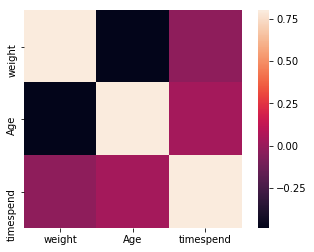

In [25]:
## Create a heat map:
#correlation matrix
import matplotlib.pyplot as plt
corrmat = final_data.drop(["House_hold_id","individual_id",0],axis=1).corr()

m=sns.heatmap(corrmat, vmax=.8, square=True);
m=m.get_figure()
m.savefig("corrpng",linewidths=0.5)



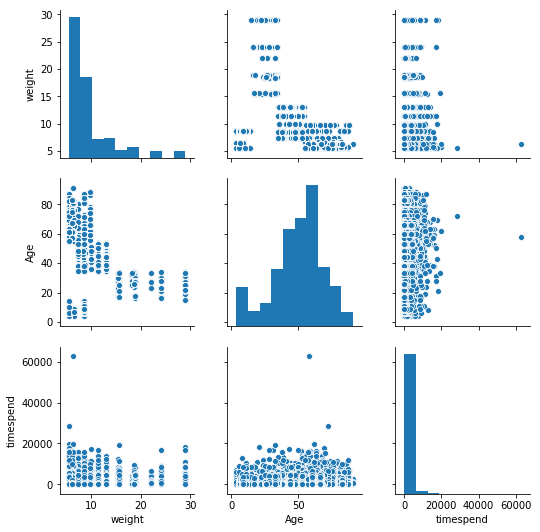

In [26]:
## Spot outliers in the data :

import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(final_data[["weight","Age","timespend"]], height= 2.5)
    

In [27]:
## Removie outliers from dataset:


final_data=final_data[final_data.timespend<=25000]
len(final_data)

13415

## Aggregating Categorical data 
Too many Categorical vriables , it could be better to count each level and count them in each level  on a per individual in each houshold . So the aggregated dataset (will have no duplicated demographic info) , all has unique rows with mean time spend and counts in the appropriate categorical info  Need to careful which demgraphics info ( for example average demographics info might be a better choice than personal income)




## Exploring categorical variable:


Each audience session is defined by the endtime-startime(timespend) and the channels that were been watched (channelgenre ) , we want to identify if there is any relationship between audience session and demographics  .


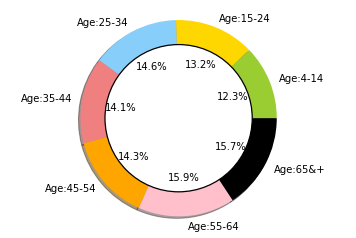

In [28]:
# Average Vieving time across movie categoirs

v1=final_data.groupby(['Age_cat'])['timespend'].mean()

labels=['Age:4-14','Age:15-24','Age:25-34','Age:35-44','Age:45-54','Age:55-64','Age:65&+']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','orange','pink','black']
explode = (0, 0, 0, 0,0,0,0)  # explode a slice if required

plt.pie(v1, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()  



C:\Users\phili\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BA4071F7F0>,
      dtype=object)

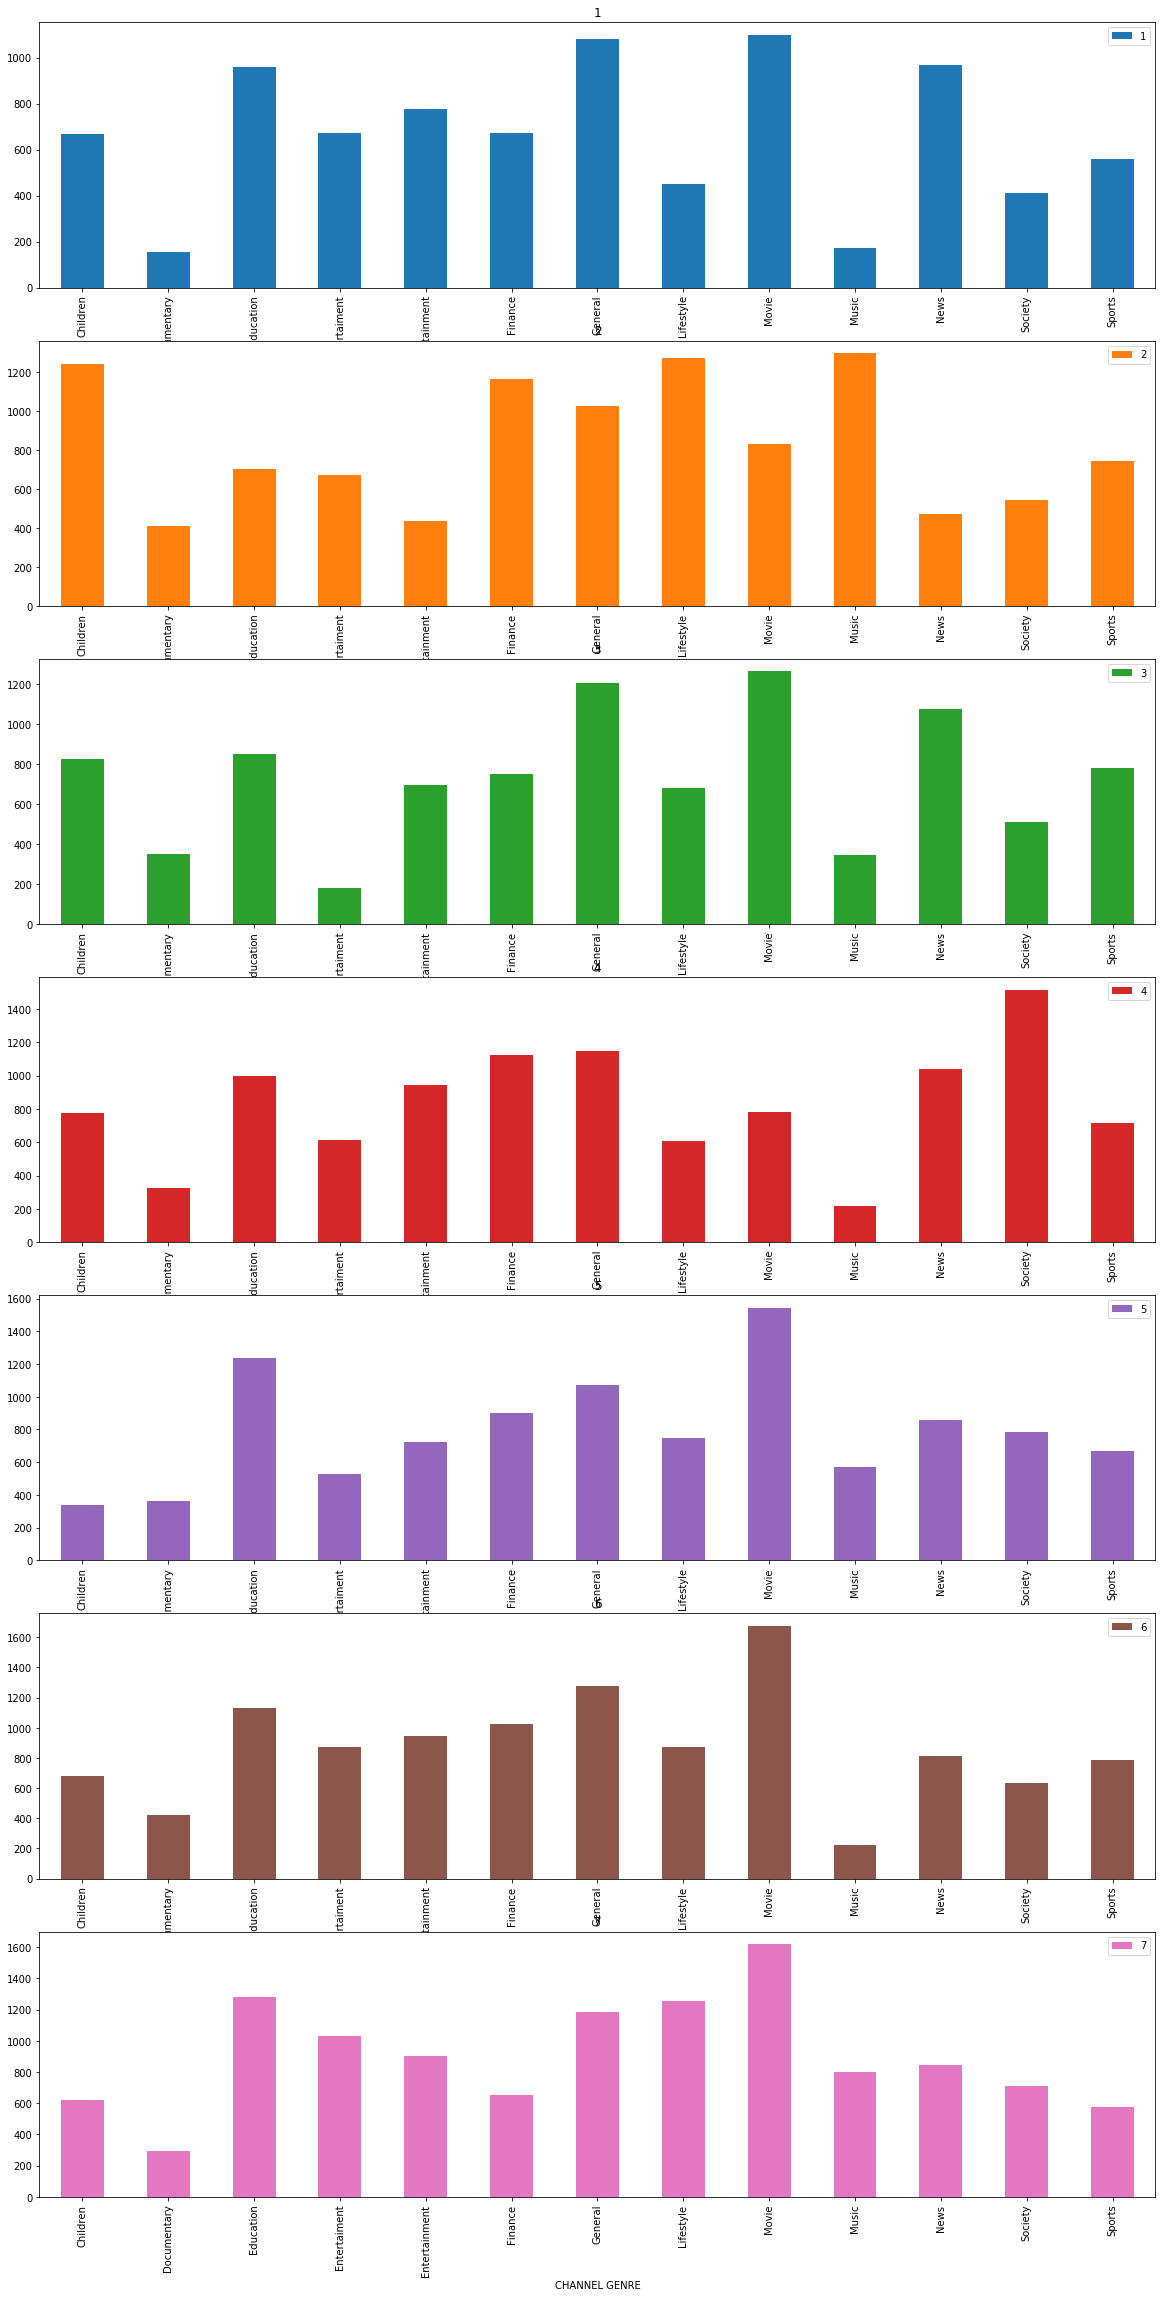

In [29]:
# For each  Age category time spend watching each genre
import matplotlib.pyplot as plt
a4_dims = (20, 40)
fig, ax = plt.subplots(figsize=a4_dims)
v2=pd.DataFrame(final_data.groupby(["CHANNEL GENRE","Age_cat"])["timespend"].mean().unstack(1))

v2.plot.bar(ax=ax,subplots=True)


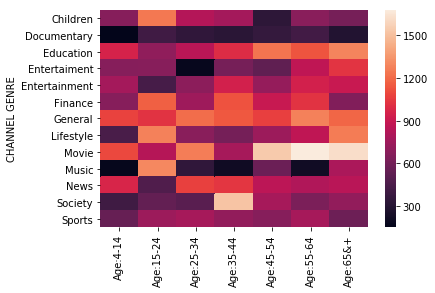

In [30]:

v2.columns=labels
p=sns.heatmap(v2)


In [31]:
final_data.start_time = pd.Series([val.time() for val in final_data.start_time])

C:\Users\phili\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


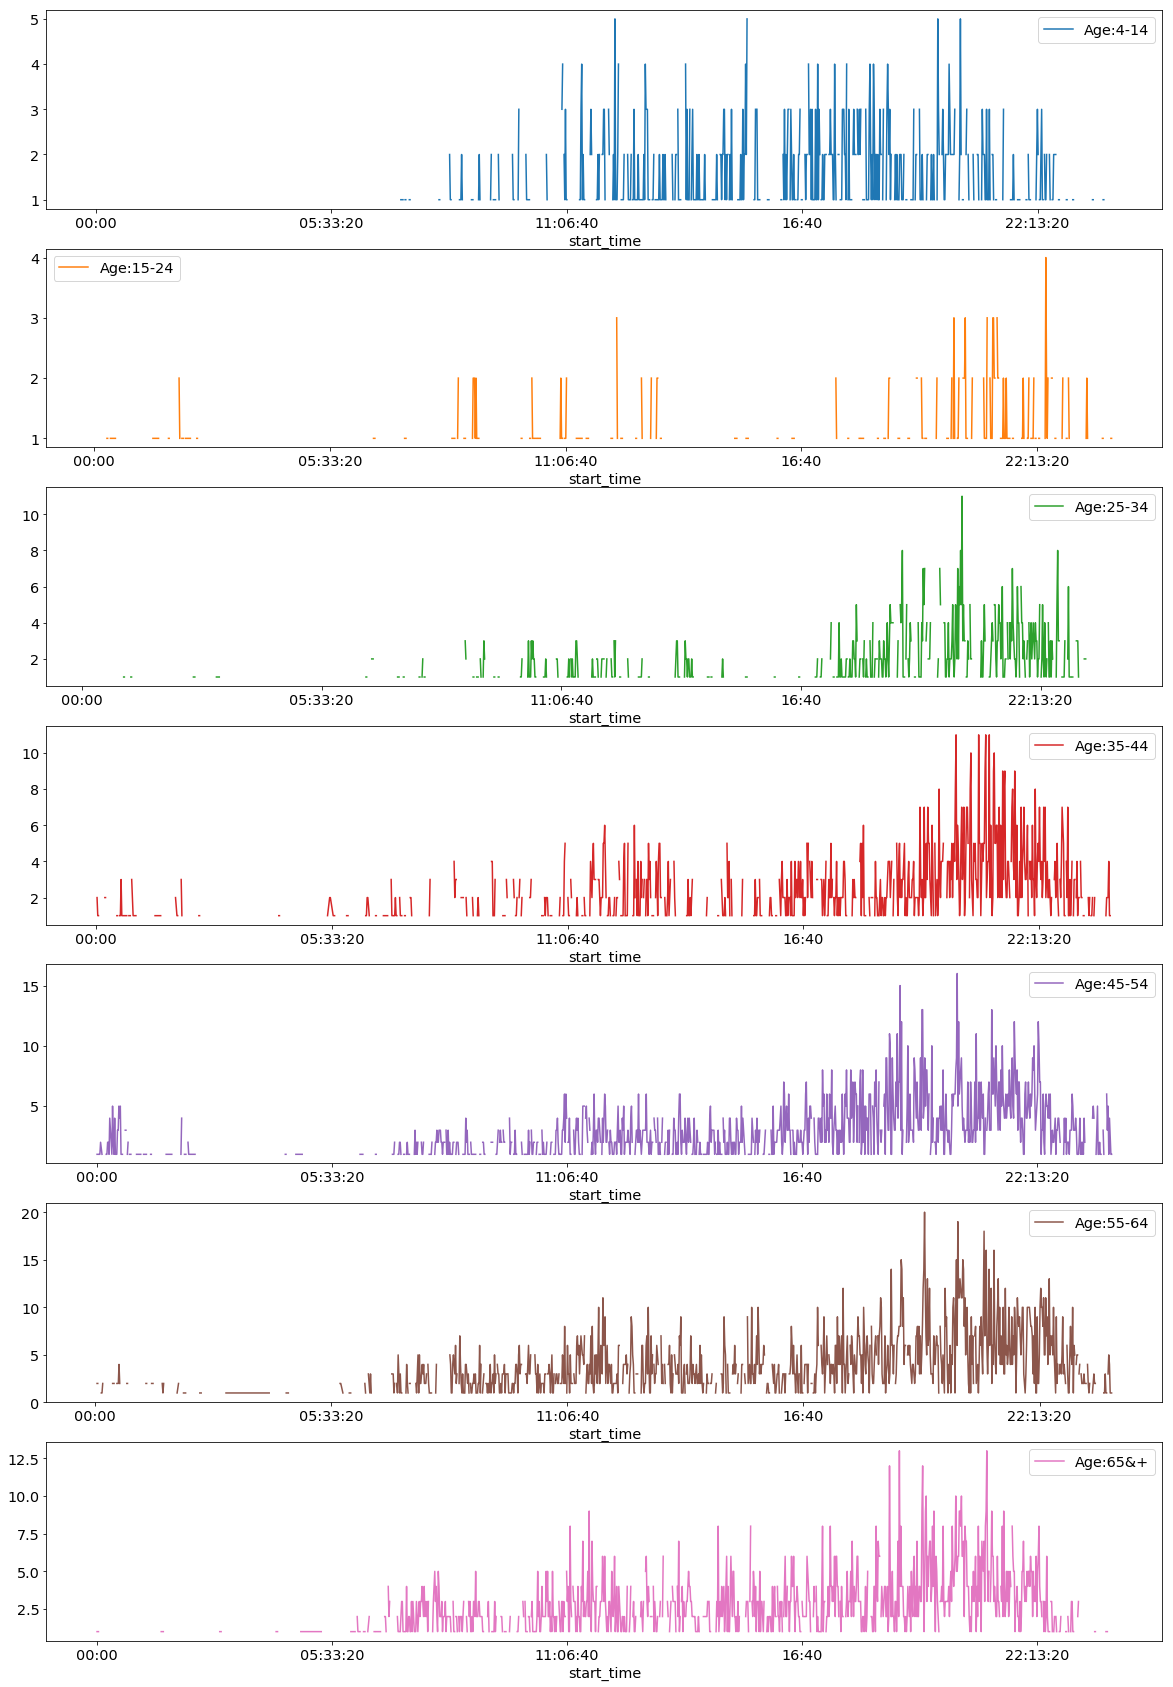

In [32]:
import matplotlib.pyplot as plt
a4_dims = (20,30)
fig, ax = plt.subplots(figsize=a4_dims)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
d1=final_data.groupby(['start_time','Age_cat']).size().unstack()
d1.columns=labels

d1.plot(subplots=True,ax=ax)

fig = plt.gcf()
fig.savefig('output.png')

In [33]:
d1.describe()

,Age:4-14,Age:15-24,Age:25-34,Age:35-44,Age:45-54,Age:55-64,Age:65&+
count,567.000000,340.000000,517.000000,744.000000,946.000000,953.000000,905.000000
mean,1.601411,1.214706,1.965184,2.518817,3.026427,3.986359,2.806630
std,0.844771,0.489797,1.417890,1.814306,2.300297,3.005741,1.933965
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000
75%,2.000000,1.000000,2.000000,3.000000,4.000000,5.000000,4.000000
max,5.000000,4.000000,11.000000,11.000000,16.000000,20.000000,13.000000


## Plot by occupaion categories 
See how the vieiwng pattern changes:
Big Hindsight should have wrote afunction

C:\Users\phili\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1804: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


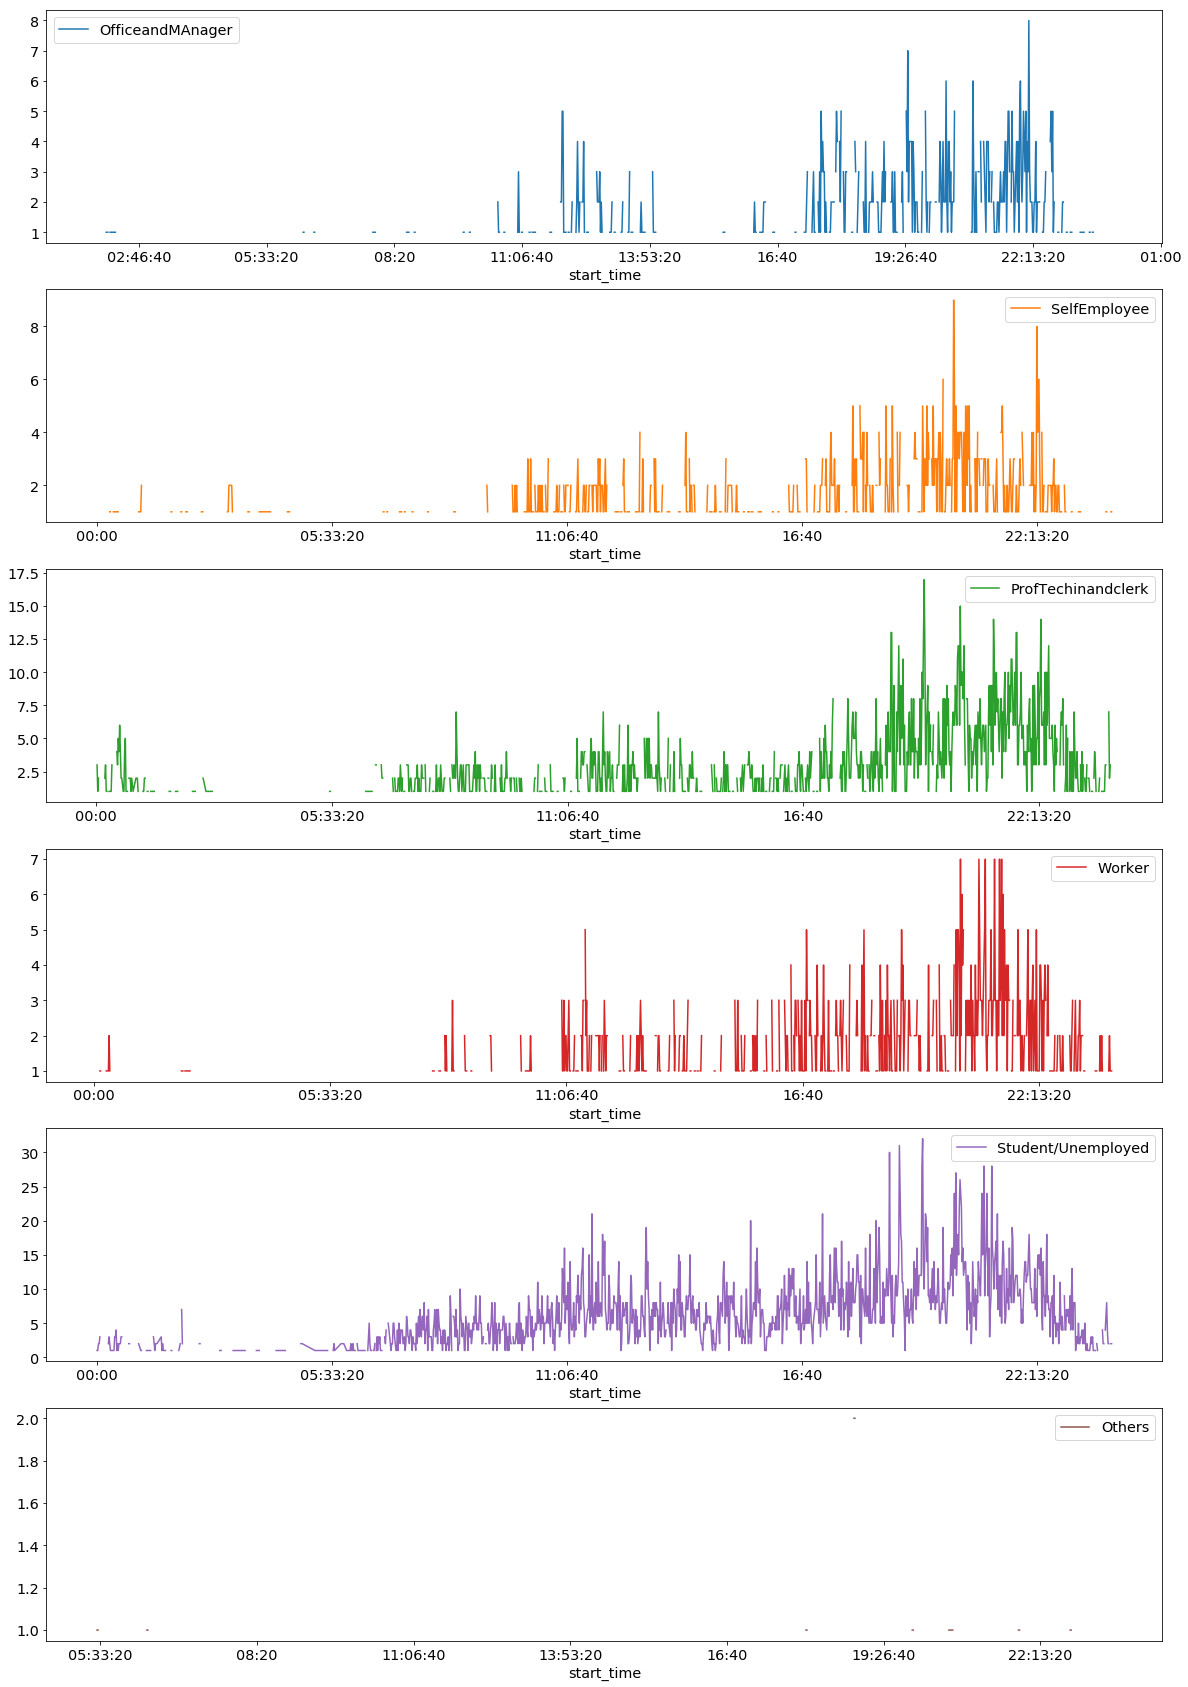

In [34]:
import matplotlib.pyplot as plt
a4_dims = (20,30)
fig, ax = plt.subplots(figsize=a4_dims)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
d2=final_data.groupby(['start_time','occupation_cat']).size().unstack()
occupations=['OfficeandMAnager','SelfEmployee','ProfTechinandclerk',"Worker","Student/Unemployed","Others"]
d2.columns=occupations

d2.plot(subplots=True,ax=ax)

fig = plt.gcf()
fig.savefig('output2.png')

Above shows time starttime attributevery useful in looking at viewing times :

Categorise into Mornign ,afternoon evening:

In [35]:

## Bug in code , causes start time to NA need to fix : for now drop 
final_data=final_data.dropna()

In [36]:
#get hours
hrs=final_data.start_time.astype(str).str.split(':', expand=True)[0]
hrs=hrs.astype('int')
final_data=final_data.assign(
    timeOfDay=pd.cut(
        hrs,
        [-1,5,11,16,19,23],
        labels=['Late-Night','Morning', 'Afternoon', 'Evening','Early-Night']))
final_data=final_data.drop([0],axis=1)

final_data.dtypes


House_hold_id                             int32
individual_id                             int32
channel_code                           category
start_time                               object
end_time                         datetime64[ns]
tv_set                                 category
audience_type                          category
weight                                  float64
viewer_type                            category
Sex                                    category
Age                                     float64
Age_cat                                category
Educationlevel                         category
occupation_cat                         category
Personal_income                        category
Grocery purch. decision maker          category
Any pet                                category
VCR                                    category
Number of TV sets in HH                category
Area                                   category
martial_status                         c

In [37]:
final_data

,House_hold_id,individual_id,channel_code,start_time,end_time,tv_set,audience_type,weight,viewer_type,Sex,...,Personal_income,Grocery purch. decision maker,Any pet,VCR,Number of TV sets in HH,Area,martial_status,CHANNEL GENRE,timespend,timeOfDay
0,26405151,1,1,12:41:00,2018-12-20 13:04:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,1439.0,Afternoon
1,26405151,1,1,20:14:00,2018-12-20 21:52:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,5939.0,Early-Night
2,26405151,1,42,08:20:00,2018-12-20 08:43:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,1439.0,Morning
3,26405151,1,42,10:37:00,2018-12-20 10:37:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,59.0,Morning
4,26405151,1,202,08:18:00,2018-12-20 08:19:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,119.0,Morning
5,26405151,1,204,12:21:00,2018-12-20 12:24:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Education,239.0,Afternoon
6,26405151,1,204,13:05:00,2018-12-20 13:17:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Education,779.0,Afternoon
7,26405151,1,205,11:15:00,2018-12-20 11:18:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Movie,239.0,Morning
8,26405151,1,205,12:20:00,2018-12-20 12:20:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Movie,59.0,Afternoon
9,26405151,1,205,17:10:00,2018-12-20 18:43:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Movie,5639.0,Evening



# Problem of aggregation
Aggegating data on individual level :  can lose lot of info ; Treat each row as unique session by a unique  indiviual .
The current data is as (1)
    * (1)
    Person A watches Channel A for time t1 
    Person A watches Channel B for time t2 
    

    However if , one can find a person B in the population such that the  demographics(Person A)==demographics (person B )

    then without losing info we can recast (1) as :
    Person A watches Channel A for time t1 
    Person B watches Channel B for time t2 
    avoiding the problem of aggregation and losing info
    
and hence in the problem , I will start with assuming same individauls session wihin households can be considered as multiple indvidiuals 
        

## One hot encodign for categorical variables



A large number of variables are categorical in nature need to recode, to avoid  disruption on model performance 

In [38]:
final_data

,House_hold_id,individual_id,channel_code,start_time,end_time,tv_set,audience_type,weight,viewer_type,Sex,...,Personal_income,Grocery purch. decision maker,Any pet,VCR,Number of TV sets in HH,Area,martial_status,CHANNEL GENRE,timespend,timeOfDay
0,26405151,1,1,12:41:00,2018-12-20 13:04:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,1439.0,Afternoon
1,26405151,1,1,20:14:00,2018-12-20 21:52:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,5939.0,Early-Night
2,26405151,1,42,08:20:00,2018-12-20 08:43:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,1439.0,Morning
3,26405151,1,42,10:37:00,2018-12-20 10:37:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,59.0,Morning
4,26405151,1,202,08:18:00,2018-12-20 08:19:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,General,119.0,Morning
5,26405151,1,204,12:21:00,2018-12-20 12:24:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Education,239.0,Afternoon
6,26405151,1,204,13:05:00,2018-12-20 13:17:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Education,779.0,Afternoon
7,26405151,1,205,11:15:00,2018-12-20 11:18:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Movie,239.0,Morning
8,26405151,1,205,12:20:00,2018-12-20 12:20:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Movie,59.0,Afternoon
9,26405151,1,205,17:10:00,2018-12-20 18:43:59,9,1,5.5611,1,2,...,12,1,2,2,1,1,2,Movie,5639.0,Evening


In [39]:
# Remove correlated columns :
data_cluster=final_data




In [40]:
data_cluster=data_cluster.drop(["House_hold_id","individual_id","channel_code","start_time","end_time","Age_cat"],axis=1)
data_cluster.columns


Index(['tv_set', 'audience_type', 'weight', 'viewer_type', 'Sex', 'Age',
       'Educationlevel', 'occupation_cat', 'Personal_income',
       'Grocery purch. decision maker', 'Any pet', 'VCR',
       'Number of TV sets in HH', 'Area', 'martial_status', 'CHANNEL GENRE',
       'timespend', 'timeOfDay'],
      dtype='object')

In [41]:
data_cluster.dtypes

tv_set                           category
audience_type                    category
weight                            float64
viewer_type                      category
Sex                              category
Age                               float64
Educationlevel                   category
occupation_cat                   category
Personal_income                  category
Grocery purch. decision maker    category
Any pet                          category
VCR                              category
Number of TV sets in HH          category
Area                             category
martial_status                   category
CHANNEL GENRE                    category
timespend                         float64
timeOfDay                        category
dtype: object

In [42]:

data_cluster_categorical=data_cluster.select_dtypes(include=['category'])
## One _hot encode 
cat_encoded=pd.get_dummies(data_cluster_categorical)
cat_encoded.head()

,tv_set_1,tv_set_2,tv_set_9,audience_type_1,viewer_type_1,Sex_1,Sex_2,Educationlevel_1,Educationlevel_2,Educationlevel_3,...,CHANNEL GENRE_Movie,CHANNEL GENRE_Music,CHANNEL GENRE_News,CHANNEL GENRE_Society,CHANNEL GENRE_Sports,timeOfDay_Late-Night,timeOfDay_Morning,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Early-Night
0,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
data_cluster=data_cluster.select_dtypes(include=['float64']).join(cat_encoded)
data_X=data_cluster
data_X=data_X.drop(["timespend"],axis=1)
data_X.head()

,weight,Age,tv_set_1,tv_set_2,tv_set_9,audience_type_1,viewer_type_1,Sex_1,Sex_2,Educationlevel_1,...,CHANNEL GENRE_Movie,CHANNEL GENRE_Music,CHANNEL GENRE_News,CHANNEL GENRE_Society,CHANNEL GENRE_Sports,timeOfDay_Late-Night,timeOfDay_Morning,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Early-Night
0,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## Run Clustering Kmeans 

In [44]:
from sklearn.cluster.k_means_ import KMeans

data_cluster=data_cluster.select_dtypes(include=['float64']).join(cat_encoded)
data_X=data_cluster
data_X=data_X.drop(["timespend"],axis=1)
data_X.head()

,weight,Age,tv_set_1,tv_set_2,tv_set_9,audience_type_1,viewer_type_1,Sex_1,Sex_2,Educationlevel_1,...,CHANNEL GENRE_Movie,CHANNEL GENRE_Music,CHANNEL GENRE_News,CHANNEL GENRE_Society,CHANNEL GENRE_Sports,timeOfDay_Late-Night,timeOfDay_Morning,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Early-Night
0,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5.5611,68.0,0,0,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


2, 3, 4, 5, 6, 7, 8, 9, 10, 

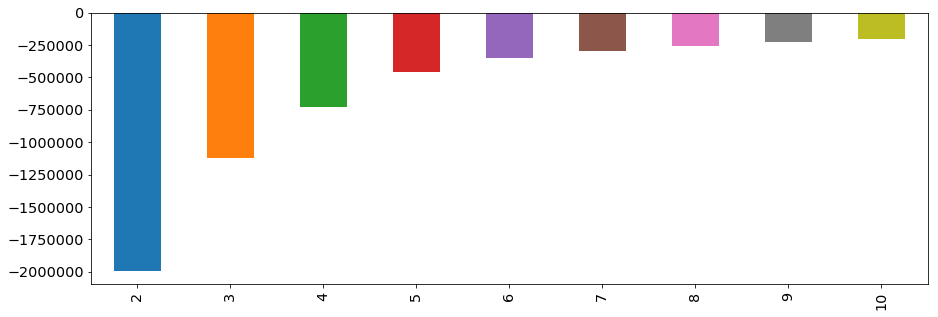

In [45]:
# Try plotting different scores :

scores = {}
for k in range(2, 11):
    print(k, end=', ')
    scores[k] = KMeans(n_clusters=k).fit(data_X).score(data_X)
_ = pd.Series(scores).plot.bar()

In [46]:
## Elbow method : cluster size 6
km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
data_cluster["cluster"]= km6.fit_predict(data_X)

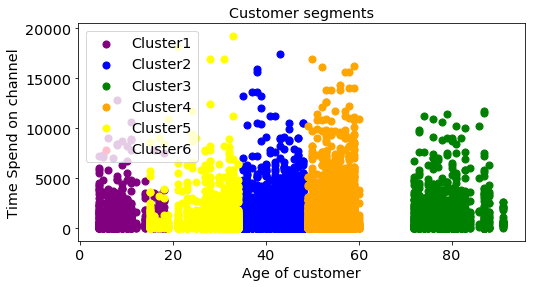

<Figure size 1080x360 with 0 Axes>

In [47]:
##Fitting kmeans to the dataset with k=4
y_means=data_cluster["cluster"]
import matplotlib.pyplot as plt
a4_dims = (8,4)
fig, ax = plt.subplots(figsize=a4_dims)


#Visualizing the clusters for k=4
plt.scatter(data_cluster[data_cluster["cluster"]==1]["Age"],data_cluster[data_cluster["cluster"]==1]["timespend"],s=50, c='purple',label='Cluster1')
plt.scatter(data_cluster[data_cluster["cluster"]==2]["Age"],data_cluster[data_cluster["cluster"]==2]["timespend"],s=50, c='blue',label='Cluster2')
plt.scatter(data_cluster[data_cluster["cluster"]==3]["Age"],data_cluster[data_cluster["cluster"]==3]["timespend"],s=50, c='green',label='Cluster3')
plt.scatter(data_cluster[data_cluster["cluster"]==4]["Age"],data_cluster[data_cluster["cluster"]==4]["timespend"],s=50, c='orange',label='Cluster4')
plt.scatter(data_cluster[data_cluster["cluster"]==5]["Age"],data_cluster[data_cluster["cluster"]==5]["timespend"],s=50, c='yellow',label='Cluster5')
plt.scatter(data_cluster[data_cluster["cluster"]==6]["Age"],data_cluster[data_cluster["cluster"]==6]["timespend"],s=50, c='pink',label='Cluster6')
#plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1],s=200,marker='s', c=centre_color, alpha=0.7, label='Centroids')
plt.title('Customer segments')

plt.xlabel('Age of customer')
plt.ylabel('Time Spend on channel')

plt.legend()
plt.show()

fig = plt.gcf()
fig.savefig('cluster1.png')

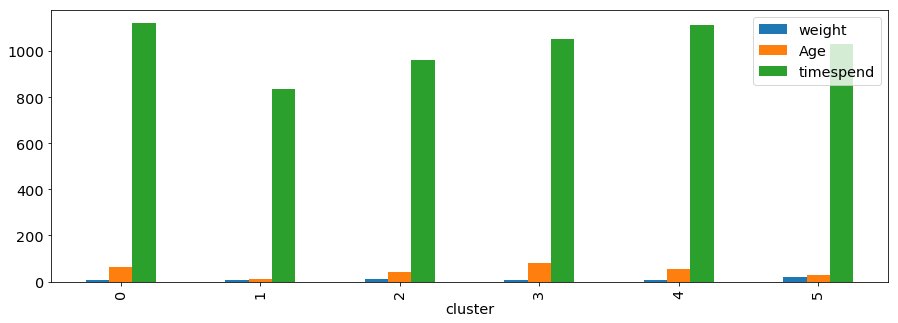

In [48]:
data_cluster.groupby(['cluster']).mean()[["weight","Age","timespend"]].plot.bar()

In [49]:

data_cluster=data_cluster.drop(["cluster"],axis=1)
from sklearn import preprocessing
## Standardise the dataset :


from sklearn.preprocessing import StandardScaler


data_cluster_st=preprocessing.normalize(data_cluster)
data_cluster_st=pd.DataFrame(data_cluster_st)
data_cluster_st.columns=data_cluster.columns
data_cluster_st.head()

,weight,Age,timespend,tv_set_1,tv_set_2,tv_set_9,audience_type_1,viewer_type_1,Sex_1,Sex_2,...,CHANNEL GENRE_Movie,CHANNEL GENRE_Music,CHANNEL GENRE_News,CHANNEL GENRE_Society,CHANNEL GENRE_Sports,timeOfDay_Late-Night,timeOfDay_Morning,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Early-Night
0,0.003860,0.047202,0.998874,0.0,0.0,0.000694,0.000694,0.000694,0.0,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000694,0.0,0.000000
1,0.000936,0.011449,0.999934,0.0,0.0,0.000168,0.000168,0.000168,0.0,0.000168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000168
2,0.003860,0.047202,0.998874,0.0,0.0,0.000694,0.000694,0.000694,0.0,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000694,0.000000,0.0,0.000000
3,0.061597,0.753192,0.653504,0.0,0.0,0.011076,0.011076,0.011076,0.0,0.011076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.011076,0.000000,0.0,0.000000
4,0.040525,0.495534,0.867184,0.0,0.0,0.007287,0.007287,0.007287,0.0,0.007287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007287,0.000000,0.0,0.000000


2, 3, 4, 5, 6, 7, 8, 9, 10, 

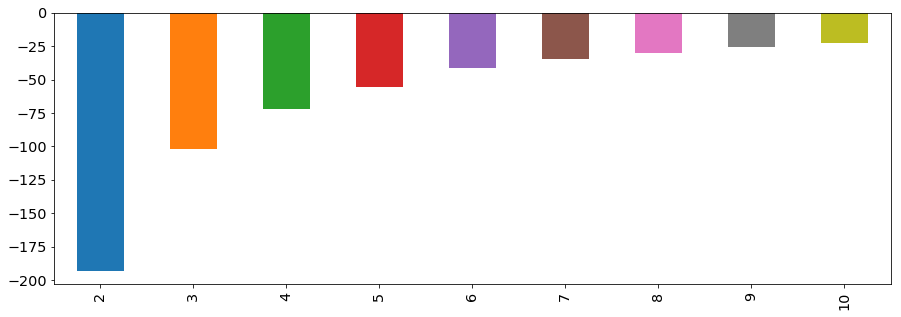

In [50]:
data_X=data_cluster_st.drop(["timespend"],axis=1)
scores = {}
for k in range(2, 11):
    print(k, end=', ')
    scores[k] = KMeans(n_clusters=k).fit(data_X).score(data_X)
_ = pd.Series(scores).plot.bar()

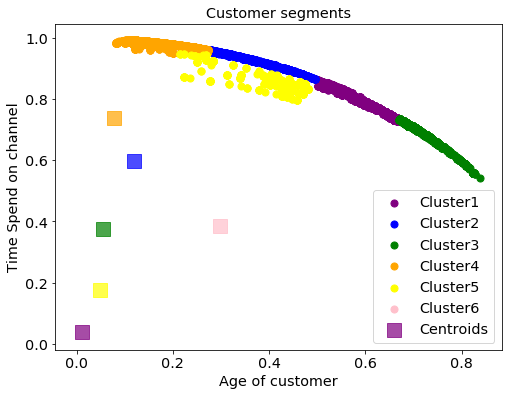

In [51]:
##Fitting kmeans to the dataset with k=4

## Elbow method : cluster size 6
km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
data_cluster_st["cluster"]= km6.fit_predict(data_X)

import matplotlib.pyplot as plt
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)

colors_=['purple','blue','green','orange','yellow','pink']
#Visualizing the clusters for k=4
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==1]["Age"],data_cluster_st[data_cluster_st["cluster"]==1]["timespend"],s=50, c='purple',label='Cluster1')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==2]["Age"],data_cluster_st[data_cluster_st["cluster"]==2]["timespend"],s=50, c='blue',label='Cluster2')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==3]["Age"],data_cluster_st[data_cluster_st["cluster"]==3]["timespend"],s=50, c='green',label='Cluster3')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==4]["Age"],data_cluster_st[data_cluster_st["cluster"]==4]["timespend"],s=50, c='orange',label='Cluster4')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==5]["Age"],data_cluster_st[data_cluster_st["cluster"]==5]["timespend"],s=50, c='yellow',label='Cluster5')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==6]["Age"],data_cluster_st[data_cluster_st["cluster"]==6]["timespend"],s=50, c='pink',label='Cluster6')

plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1],s=200,marker='s', c=colors_, alpha=0.7, label='Centroids')
plt.title('Customer segments')

plt.xlabel('Age of customer')
plt.ylabel('Time Spend on channel')

plt.legend()
plt.show()



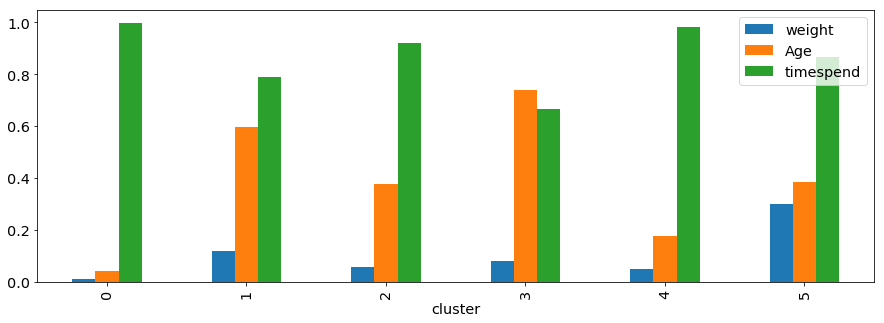

In [52]:
data_cluster_st.groupby(['cluster']).mean()[["weight","Age","timespend"]].plot.bar()

## Idenftifying Cluster 1  Individuals

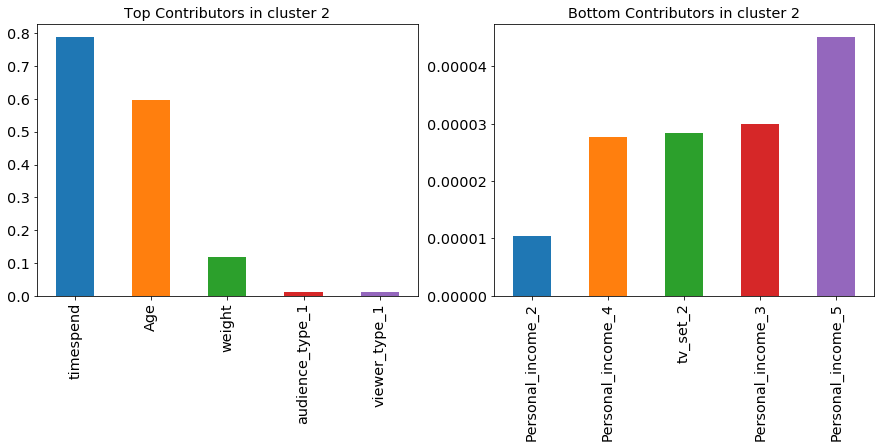

In [53]:

fig, axes = plt.subplots(nrows=1, ncols=2)

data_cluster_st[data_cluster_st["cluster"]==1].drop("cluster",axis=1).mean().nlargest(5).plot.bar(title="Top Contributors in cluster 2",ax=axes[0])
data_cluster_st[data_cluster_st["cluster"]==1].drop("cluster",axis=1).mean().nsmallest(5).plot.bar(title="Bottom Contributors in cluster 2",ax=axes[1])


## Aggregate data across individual id  ?

Due to the dupication of demographics , info can aggregate across Individual ids :
    
    





In [54]:
agg_num_data=final_data.drop(["channel_code","start_time","end_time","Age_cat"],axis=1).select_dtypes(["float64"]).join([final_data.House_hold_id,final_data.individual_id])


agg_num_data=agg_num_data.groupby(["House_hold_id","individual_id"]).mean()
agg_num_data.head()

weight   Age   timespend
House_hold_id individual_id                           
26405151      1               5.5611  68.0  1394.00000
              2               6.2414  68.0  3439.00000
26405338      2               5.5611  61.0  1679.00000
              3              18.6235  29.0  1679.00000
26405431      1               5.5611  68.0   917.62069

In [82]:
## Use mode 

agg_cat_data=cat_encoded.join([final_data.House_hold_id,final_data.individual_id]).groupby(["House_hold_id","individual_id"]).sum()

In [83]:
agg_data=agg_num_data.join(agg_cat_data)
agg_data.head()

weight   Age   timespend  tv_set_1  tv_set_2  \
House_hold_id individual_id                                                  
26405151      1               5.5611  68.0  1394.00000         0         0   
              2               6.2414  68.0  3439.00000         0         0   
26405338      2               5.5611  61.0  1679.00000         0         0   
              3              18.6235  29.0  1679.00000         0         0   
26405431      1               5.5611  68.0   917.62069         9         0   

                             tv_set_9  audience_type_1  viewer_type_1  Sex_1  \
House_hold_id individual_id                                                    
26405151      1                    16               16             16      0   
              2                     3                3              3      3   
26405338      2                     2                2              2      0   
              3                     2                2              2      2   
26405431      1                    20               29             29      0   

                             Sex_2          ...            \
House_hold_id individual_id                 ...             
26405151      1                 16          ...             
              2                  0          ...             
26405338      2                  2          ...             
              3                  0          ...             
26405431      1                 29          ...             

                             CHANNEL GENRE_Movie  CHANNEL GENRE_Music  \
House_hold_id individual_id                                             
26405151      1                                3                    0   
              2                                1                    0   
26405338      2                                0                    0   
              3                                0                    0   
26405431      1                                1                    0   

                             CHANNEL GENRE_News  CHANNEL GENRE_Society  \
House_hold_id individual_id                                              
26405151      1                               1                      0   
              2                               1                      0   
26405338      2                               0                      0   
              3                               0                      0   
26405431      1                               2                      1   

                             CHANNEL GENRE_Sports  timeOfDay_Late-Night  \
House_hold_id individual_id                                               
26405151      1                                 3                     0   
              2                                 0                     0   
26405338      2                                 0                     0   
              3                                 0                     0   
26405431      1                                 0                     0   

                             timeOfDay_Morning  timeOfDay_Afternoon  \
House_hold_id individual_id                                           
26405151      1                              7                    6   
              2                              0                    0   
26405338      2                              0                    0   
              3                              0                    0   
26405431      1                              0                   20   

                             timeOfDay_Evening  timeOfDay_Early-Night  
House_hold_id individual_id                                            
26405151      1                              2                      1  
              2                              2                      1  
26405338      2                              2                      0  
              3                              2                      0  
2640543

In [84]:
## Apply clustering with normalised featurs :


data_cluster_st=preprocessing.normalize(agg_data)
data_cluster_st=pd.DataFrame(data_cluster_st)
data_cluster_st.columns=agg_data.columns
data_cluster_st.head()


,weight,Age,timespend,tv_set_1,tv_set_2,tv_set_9,audience_type_1,viewer_type_1,Sex_1,Sex_2,...,CHANNEL GENRE_Movie,CHANNEL GENRE_Music,CHANNEL GENRE_News,CHANNEL GENRE_Society,CHANNEL GENRE_Sports,timeOfDay_Late-Night,timeOfDay_Morning,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Early-Night
0,0.003981,0.048679,0.997914,0.000000,0.0,0.011454,0.011454,0.011454,0.000000,0.011454,...,0.002148,0.0,0.000716,0.00000,0.002148,0.0,0.005011,0.004295,0.001432,0.000716
1,0.001815,0.019769,0.999798,0.000000,0.0,0.000872,0.000872,0.000872,0.000872,0.000000,...,0.000291,0.0,0.000291,0.00000,0.000000,0.0,0.000000,0.000000,0.000581,0.000291
2,0.003310,0.036307,0.999325,0.000000,0.0,0.001190,0.001190,0.001190,0.000000,0.001190,...,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.001190,0.000000
3,0.011090,0.017268,0.999779,0.000000,0.0,0.001191,0.001191,0.001191,0.001191,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.001191,0.000000
4,0.006004,0.073416,0.990704,0.009717,0.0,0.021593,0.031310,0.031310,0.000000,0.031310,...,0.001080,0.0,0.002159,0.00108,0.000000,0.0,0.000000,0.021593,0.004319,0.005398


2, 3, 4, 5, 6, 7, 8, 9, 10, 

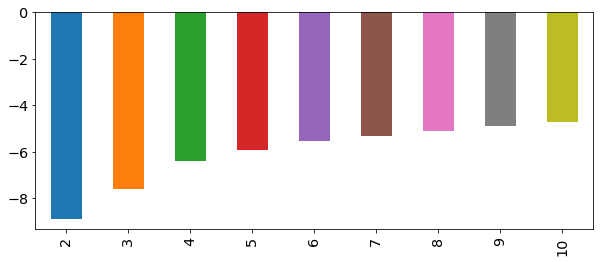

In [85]:
data_X=data_cluster_st.drop(["timespend"],axis=1)
scores = {}
for k in range(2, 11):
    print(k, end=', ')
    scores[k] = KMeans(n_clusters=k).fit(data_X).score(data_X)
_ = pd.Series(scores).plot.bar()

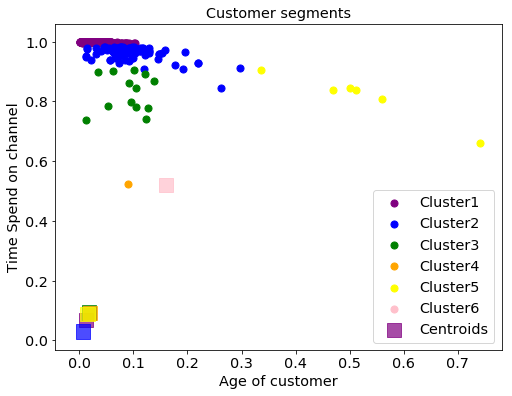

In [86]:
##Fitting kmeans to the dataset with k=4

## Elbow method : cluster size 6
km6=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
data_cluster_st["cluster"]= km6.fit_predict(data_X)

import matplotlib.pyplot as plt
a4_dims = (8,6)
fig, ax = plt.subplots(figsize=a4_dims)

colors_=['purple','blue','green','orange','yellow','pink']
#Visualizing the clusters for k=4
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==1]["Age"],data_cluster_st[data_cluster_st["cluster"]==1]["timespend"],s=50, c='purple',label='Cluster1')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==2]["Age"],data_cluster_st[data_cluster_st["cluster"]==2]["timespend"],s=50, c='blue',label='Cluster2')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==3]["Age"],data_cluster_st[data_cluster_st["cluster"]==3]["timespend"],s=50, c='green',label='Cluster3')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==4]["Age"],data_cluster_st[data_cluster_st["cluster"]==4]["timespend"],s=50, c='orange',label='Cluster4')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==5]["Age"],data_cluster_st[data_cluster_st["cluster"]==5]["timespend"],s=50, c='yellow',label='Cluster5')
plt.scatter(data_cluster_st[data_cluster_st["cluster"]==6]["Age"],data_cluster_st[data_cluster_st["cluster"]==6]["timespend"],s=50, c='pink',label='Cluster6')

plt.scatter(km6.cluster_centers_[:,0], km6.cluster_centers_[:,1],s=200,marker='s', c=colors_, alpha=0.7, label='Centroids')
plt.title('Customer segments')

plt.xlabel('Age of customer')
plt.ylabel('Time Spend on channel')

plt.legend()
plt.show()

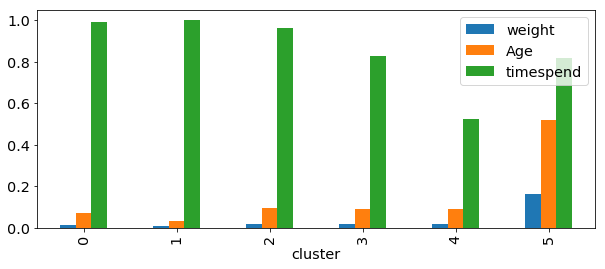

In [87]:
data_cluster_st.groupby(['cluster']).mean()[["weight","Age","timespend"]].plot.bar()

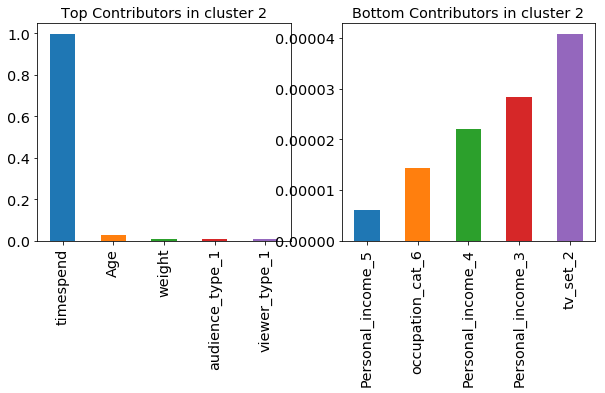

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2)

data_cluster_st[data_cluster_st["cluster"]==1].drop("cluster",axis=1).mean().nlargest(5).plot.bar(title="Top Contributors in cluster 2",ax=axes[0])
data_cluster_st[data_cluster_st["cluster"]==1].drop("cluster",axis=1).mean().nsmallest(5).plot.bar(title="Bottom Contributors in cluster 2",ax=axes[1])


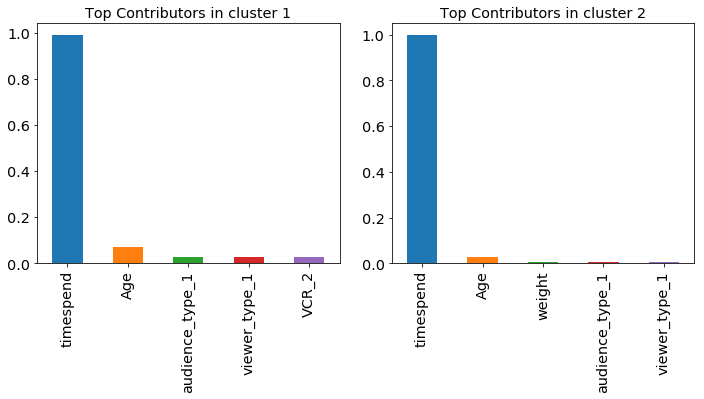

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.rcParams["figure.figsize"] = [8 ,4]
fig.tight_layout()
data_cluster_st[data_cluster_st["cluster"]==0].drop("cluster",axis=1).mean().nlargest(5).plot.bar(title="Top Contributors in cluster 1",ax=axes[0])
data_cluster_st[data_cluster_st["cluster"]==1].drop("cluster",axis=1).mean().nlargest(5).plot.bar(title="Top Contributors in cluster 2",ax=axes[1])


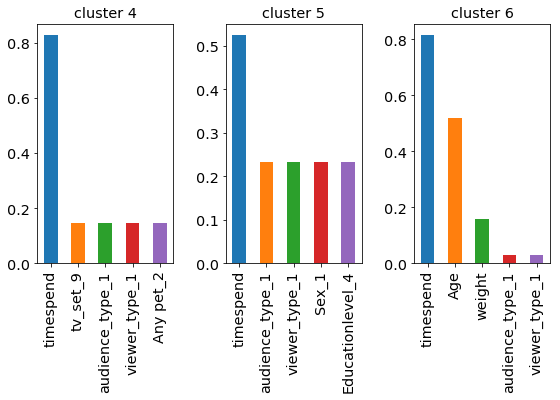

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = [10 ,4]
fig.tight_layout()

data_cluster_st[data_cluster_st["cluster"]==3].drop("cluster",axis=1).mean().nlargest(5).plot.bar(title="cluster 4",ax=axes[0])
data_cluster_st[data_cluster_st["cluster"]==4].drop("cluster",axis=1).mean().nlargest(5).plot.bar(title="cluster 5",ax=axes[1])
data_cluster_st[data_cluster_st["cluster"]==5].drop("cluster",axis=1).mean().nlargest(5).plot.bar(title="cluster 6",ax=axes[2])
fig = plt.gcf()
fig.savefig('cluster_final.png')

In [93]:
data_cluster_st[data_cluster_st["cluster"]==1].drop("cluster",axis=1)

,weight,Age,timespend,tv_set_1,tv_set_2,tv_set_9,audience_type_1,viewer_type_1,Sex_1,Sex_2,...,CHANNEL GENRE_Movie,CHANNEL GENRE_Music,CHANNEL GENRE_News,CHANNEL GENRE_Society,CHANNEL GENRE_Sports,timeOfDay_Late-Night,timeOfDay_Morning,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Early-Night
0,0.003981,0.048679,0.997914,0.000000,0.0,0.011454,0.011454,0.011454,0.000000,0.011454,...,0.002148,0.000000,0.000716,0.000000,0.002148,0.000000,0.005011,0.004295,0.001432,0.000716
1,0.001815,0.019769,0.999798,0.000000,0.0,0.000872,0.000872,0.000872,0.000872,0.000000,...,0.000291,0.000000,0.000291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000581,0.000291
2,0.003310,0.036307,0.999325,0.000000,0.0,0.001190,0.001190,0.001190,0.000000,0.001190,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001190,0.000000
3,0.011090,0.017268,0.999779,0.000000,0.0,0.001191,0.001191,0.001191,0.001191,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001191,0.000000
7,0.007146,0.038207,0.998911,0.000000,0.0,0.006792,0.006792,0.006792,0.006792,0.000000,...,0.000849,0.000000,0.000849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006792
11,0.014294,0.014993,0.997835,0.000000,0.0,0.016658,0.016658,0.016658,0.000000,0.016658,...,0.000000,0.000000,0.000000,0.000000,0.001666,0.000000,0.006663,0.009995,0.000000,0.000000
21,0.009847,0.037906,0.998479,0.000000,0.0,0.010338,0.010338,0.010338,0.000000,0.010338,...,0.000000,0.000000,0.000000,0.000862,0.001723,0.000000,0.000000,0.000000,0.000862,0.009477
22,0.003715,0.035641,0.999233,0.000000,0.0,0.004294,0.004294,0.004294,0.000000,0.004294,...,0.000429,0.000000,0.000429,0.000000,0.001288,0.000000,0.001288,0.000859,0.001718,0.000429
24,0.003240,0.014741,0.999831,0.000000,0.0,0.002835,0.002835,0.002835,0.000000,0.002835,...,0.000000,0.000000,0.000283,0.000567,0.000000,0.000000,0.000000,0.001417,0.000850,0.000567
25,0.003221,0.018576,0.999810,0.000000,0.0,0.001327,0.001327,0.001327,0.001327,0.000000,...,0.000000,0.000000,0.000000,0.000663,0.000000,0.000000,0.000000,0.000000,0.000663,0.000663
